In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import cv2
import pims
import trackpy as tp
from tkinter.filedialog import askopenfilenames

In [8]:
path = askopenfilenames()

In [64]:
@pims.pipeline
def gray(image):
    image=image[400:-1200,600:]
    return(image)

frames = gray(pims.open('E:/Experiments/omicron/test_22/center/*.tiff'))

In [68]:
f = tp.locate(frames[0], 15, invert=True, minmass=400)

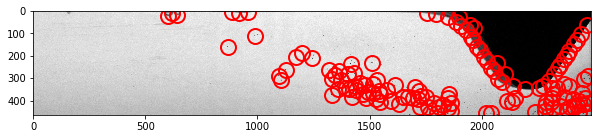

In [69]:
tp.annotate(f, frames[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F201E2F898>,
      dtype=object)

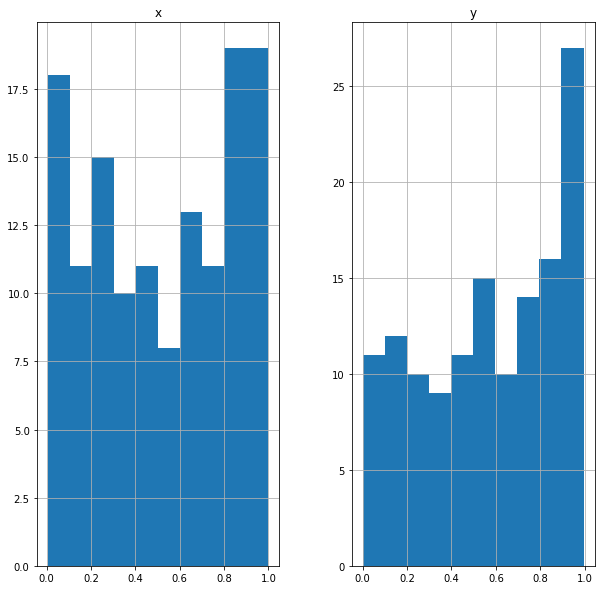

In [70]:
tp.subpx_bias(f)

In [71]:
f = tp.batch(frames, 15, invert=True, minmass=500);

Frame 360: 60 features


In [72]:
t = tp.link(f, 16, memory=3)

Frame 360: 60 trajectories present.


In [73]:
t1 = tp.filter_stubs(t, 11)

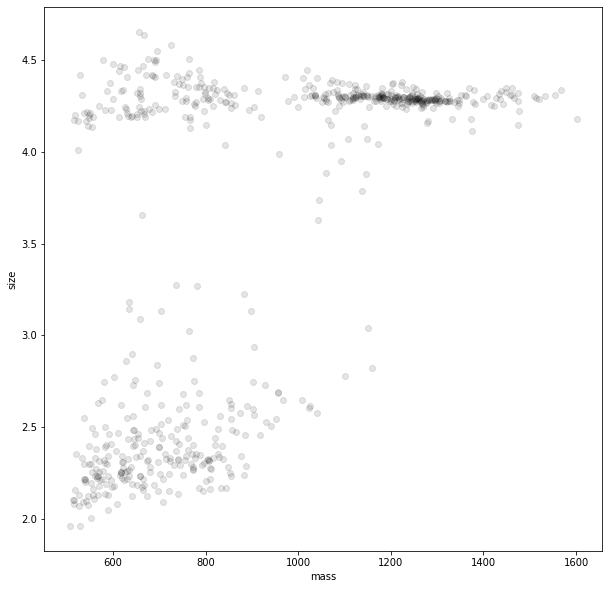

In [74]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

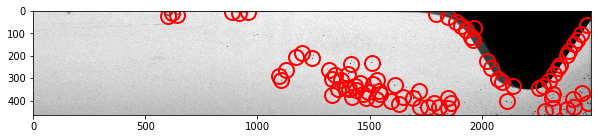

In [75]:
plt.figure()
tp.annotate(t1[t1['frame'] == 0], frames[0])

In [76]:
t2 = t1[((t1['size'] < 4))]#&(t1['mass'] > 500) & (t1['ecc'] < 0.3)]

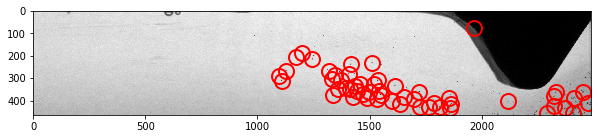

In [77]:
plt.figure()
tp.annotate(t2[t2['frame'] == 1], frames[1]);

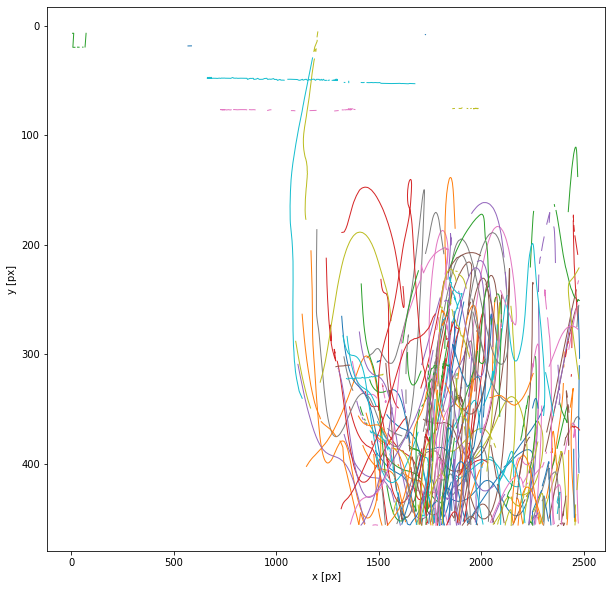

In [78]:
plt.figure(figsize=(10,10))
ax = tp.plot_traj(t2)
plt.show()

In [79]:
d = tp.compute_drift(t2)

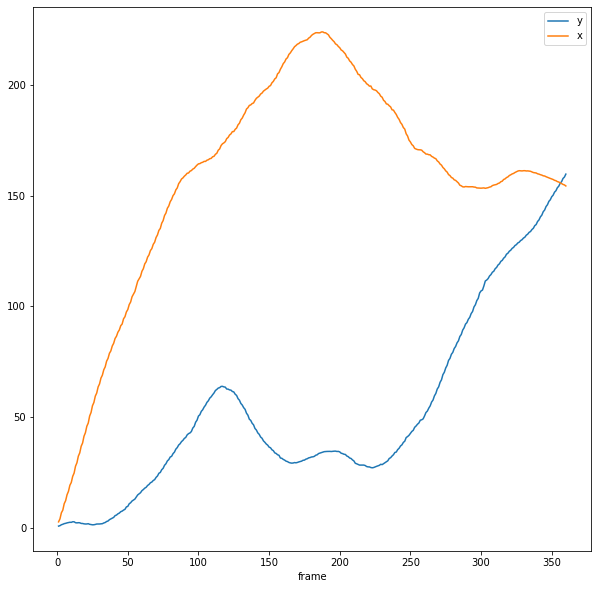

In [80]:
d.plot()
plt.show()


In [81]:
tm = tp.subtract_drift(t2.copy(), d)

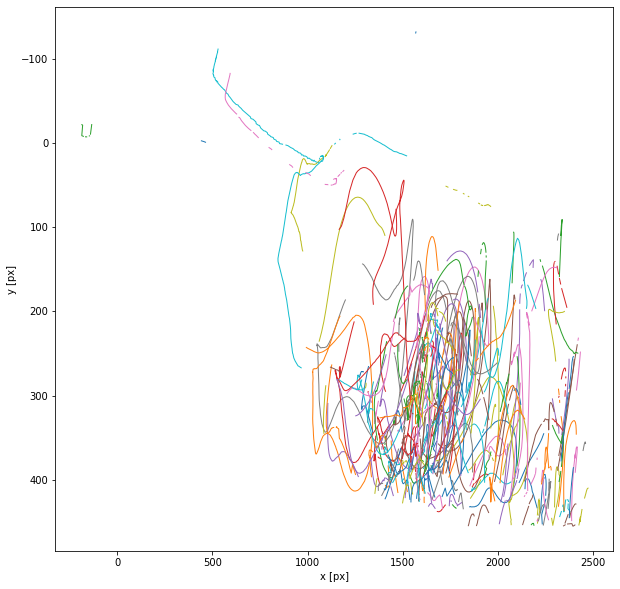

In [82]:
ax = tp.plot_traj(tm)
plt.show()